### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자
- 딥러닝으로 이진분류 실습을 진행하자


In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 사이킷런 내장 유방암 데이터

In [ ]:
# 데이터 불러오기
breast_data = load_breast_cancer()
print(breast_data)
# 머신러닝 데이터 구조 : bunch 객체 (딕셔너리 형태)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
# bunch 객체 key값 확인
breast_data.keys()

# data : 문제 데이터, 입력 특성
# target : 정답 데이터
# target_names : 정답 데이터 이름

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 정답 데이터 확인
breast_data.target

# 0번 데이터는 악성(malignant), 1번 데이터는 양성(benign)
# 클래스의 개수 : 2개 -> 이진분류

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
breast_data.target_names # 0번 데이터는 악성, 1번 데이터는 양성

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# 문제, 정답 분리
# 문제 X, 정답 y

X = breast_data['data']
y = breast_data['target']

In [ ]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [ ]:
# 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

# 입력 특성 30개 -> 입력층에서 우리가 input_shape 써야 되어서 중요

(455, 30) (455,)
(114, 30) (114,)


### 모델링 과정
1. 신경망 구조 설계 (뼈대, 입력층, 중간층, 출력층)
2. 신경망 학습 및 평가 방법 설정 (회귀, 분류)
3. 모델 학습
4. 모델 예측 및 평가

In [ ]:
# 모델 생성을 위한 도구 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 모델 구조 설계
# 뼈대
model = Sequential()
# 입력층
model.add(InputLayer(input_shape = (30,))) # 입력 특성의 개수를 정확하게 작성

# 중간층(은닉층)
model.add(Dense(units = 16, activation = 'sigmoid')) # 뉴런 10개를 연결해서 딥러닝 모델을 만들겠다 / 학습의 능력을 결정하는 층
model.add(Dense(units = 8, activation = 'sigmoid'))

# 출력층 : 최종으로 출력 받고 싶어하는 데이터의 형태 지정 -> 분류는 확률값을 알아야 됨 0.5 기준 or 하나의 직선으로 나뉨
# 이진 분류 1개의 확률값 0~1
model.add(Dense(units = 1, activation = 'sigmoid'))
# sigmoid : s자형 곡선을 가지는 함수로 0~1 사이의 값을 반환

In [ ]:
# 2. 모델 학습 및 평가 방법 설정
model.compile(loss = 'binary_crossentropy', # 오차값 : 이진분류 -> binary_crossentropy
              optimizer = 'SGD',            # 최적화 알고리즘(확률적 경사하강법)
              metrics = ['accuracy'])       # 평가 방법(분류는 정확도를 사용) : 100개 중에서 총 몇 개를 맞춰는지의 비율

In [ ]:
# 3. 모델학습 및 시각화
h1 = model.fit(X_train, y_train, validation_split=0.2, # 검증 데이터는 우리의 일반화를 확인한다
               epochs = 100)                            # 반복 횟수 30번

In [ ]:
h1.history

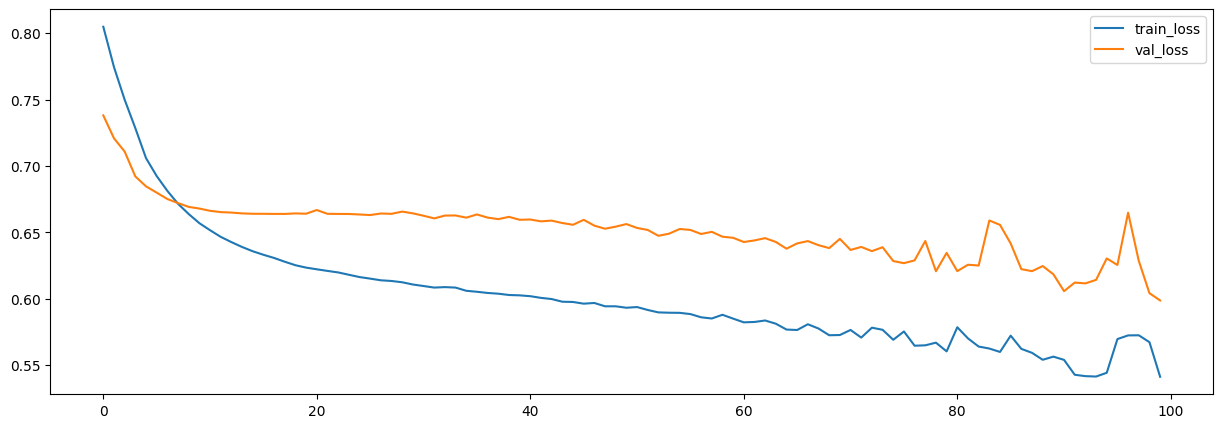

In [ ]:
# 모델 시각화

plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'], label='train_loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 모델에 대한 전체적인 내부구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
